<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team-27/blob/main/Actividad_Semana4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad Semanal 4**

#**PCA**

#Materia: Ciencia de Datos



Alumno: Diego de Jesús Castillo Ramírez

Matrícula: A01793738


Profesor: Jobish Vallikavungal Devassia




11/10/2022

In [2]:
import pandas as pd
import numpy as np

In [7]:
credit = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

#
Parte 1

In [77]:
#Eliminar los  NA
credit_df = pd.read_csv(credit)
df = credit_df.copy()
df.dropna(axis= 0, inplace= True)
df.head(10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

In [16]:
#Quita las columnas con valores categoricos
df_nuevo = df[["X1","X5","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23"]].copy()
df_nuevo.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [17]:

df_nuevo.corr()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
X5,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
X12,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
X13,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
X14,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
X15,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
X16,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
X17,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
X18,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
X19,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


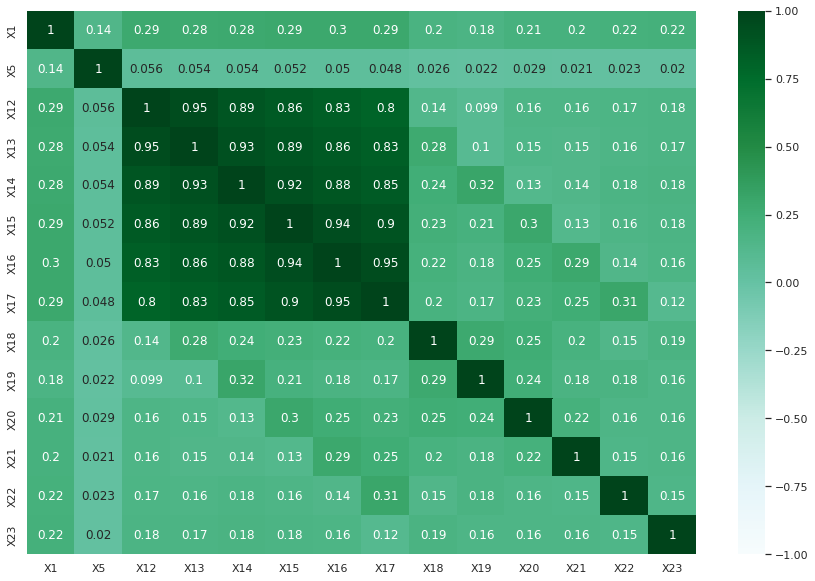

In [27]:
import seaborn as sns
corrs= df_nuevo.corr()

sns.set(rc = {"figure.figsize": (15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap ="BuGn", annot = True)

In [75]:
cols = ["X1","X17","X23"]
summary = {
    "Varianzas": df_nuevo[cols].var()[0:3],
    "Valor Min": df_nuevo[cols].min()[0:3],
    "Valor Max": df_nuevo[cols].max()[0:3]
}

pd.DataFrame(summary, index = cols).transpose()

,X1,X17,X23
Varianzas,1.683177e+10,3.550120e+09,3.164479e+08
Valor Min,1.000000e+04,-3.396030e+05,0.000000e+00
Valor Max,1.000000e+06,9.616640e+05,5.286660e+05


In [37]:
t = df_nuevo.var().sum()

var_x1 = df_nuevo.X1.var()
var_x17 = df_nuevo.X17.var()
var_x23 = df_nuevo.X23.var()

print("Varianza Total \t: ",t.round(2))
print('Varianza X1 \t:', ((var_x1/t)*100).round(2),'%' )
print('Varianza X17 \t:', ((var_x17/t)*100).round(2),'%' )
print('Varianza X23 \t:', ((var_x23/t)*100).round(2),'%' )

Varianza Total 	:  45450192693.29
Varianza X1 	: 37.03 %
Varianza X17 	: 7.81 %
Varianza X23 	: 0.7 %


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_nuevo)

scaled[:5]

array([[-1.13736269, -1.24628151, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388, -0.34188963, -0.22713422,
        -0.29678248, -0.30810735, -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248, -0.34188963, -0.21364509,
        -0.24001926, -0.24431534, -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0.25027025, -0.19195838,
        -0.24001926, -0.24431534, -0.24870184, -0.01240721],
       [-0.90612232,  0.16458968, -0.057797  , -0.01358648,  0.03255235,
        -0.23251237, -0.18692884, -0.15680815, -0.22117899, -0.16944758,
        -0.22866662, -0.23793614, -0.2441877 , -0.23726923],
       [-0.90612232,  2.33516075, -0.57864758, -0.6112971 , -0.16138262,
        -0.34708021, -0.34825998, -0.33162637, -0.22117899,  1.33396163,
         0.27084964,  0.26

In [47]:
scaled_df = pd.DataFrame(scaled, columns=df_nuevo.columns)
scaled_df.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [49]:
summary = {
    "Varianzas": scaled_df[cols].var()[0:3],
    "Valor Min": scaled_df[cols].min()[0:3],
    "Valor Max": scaled_df[cols].max()[0:3],
}

pd.DataFrame(summary, index = cols).transpose()

,X1,X17,X23
Varianzas,1.000033,1.000033,1.000033
Valor Min,-1.214443,-6.352483,-0.293485
Valor Max,6.416489,15.487493,29.425741


In [51]:
from sklearn.decomposition import PCA

pcs = PCA()

pcs_t= pcs.fit_transform(scaled_df)
pcs_t[:5]

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00,
        -1.76466173e-01,  1.78476835e-02,  2.77646145e-03,
         1.29010046e-02,  5.80885205e-02,  2.21268695e-01,
         2.02066015e-02,  1.68710287e-02, -3.14858410e-03,
         8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01,
        -2.80889399e-01,  4.94098943e-02, -1.18062416e-01,
         9.91641641e-02,  7.52386637e-02, -2.87026648e-01,
        -7.30485666e-02, -5.57769745e-03,  1.22574823e-02,
        -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01,
        -7.66632559e-03,  1.26938297e-01, -6.20521778e-02,
        -1.40071875e-02,  8.40632249e-02,  2.82844658e-01,
        -1.60703686e-02,  1.12401687e-01, -8.04550604e-02,
        -4.13466939e-02, -5.71189238e-02],
       [-5.41595290e-01, -6.66646687e-01,  9.76280692e-02,
         2.92571245e-01,  8.85437669e-03,  1.09430096e-01,
        -1.34229136e-01,  6.32182383e-02,  5.

In [55]:
pcsSummary_df = pd.DataFrame({
                                "% varianza explicada" : np.round(pcs.
  explained_variance_ratio_,4) *100,
                              "% varianza acumulada" : np.cumsum(pcs.
  explained_variance_ratio_) * 100                                                              
                            })

pcsSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


Aquí podemos observar que los primeros 8 componentes son los que contienen mayor información, por los que son los que representan la mayor parte de la variación de los datos.

In [56]:
pcs_labels = [f'PC{i +1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels

pcsSummary_df

#Se muestra los componentes que tienen mayor representación

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [59]:
pcs_df = pd.DataFrame(pcs_t, columns = pcs_labels)

print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [60]:
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [64]:
total_var = scaled_df.var().sum()

pd.DataFrame({
    "Porcentaje Varianza": (scaled_df.var()/total_var *100),
    "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum()/ total_var) *
    100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,7.142857,7.142857
X5,7.142857,14.285714
X12,7.142857,21.428571
X13,7.142857,28.571429
X14,7.142857,35.714286
X15,7.142857,42.857143
X16,7.142857,50.000000
X17,7.142857,57.142857
X18,7.142857,64.285714
X19,7.142857,71.428571


In [67]:
comps_df = pd.DataFrame(
    pcs.components_.round(4),
    columns = pcs_df.columns,
    index= scaled_df.columns)

comps_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885
X5,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059
X12,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339
X13,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396
X14,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068
X15,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993
X16,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076
X17,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498
X18,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237
X19,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200


In [68]:
#Variables que tienen más peso en cada componente
comps_df.iloc[:,:7].abs().idxmax()

PC1    X18
PC2    X12
PC3    X19
PC4    X23
PC5    X23
PC6    X20
PC7    X22
dtype: object

In [69]:
comps_df.iloc[:,:10].abs().idxmax()

PC1     X18
PC2     X12
PC3     X19
PC4     X23
PC5     X23
PC6     X20
PC7     X22
PC8     X20
PC9     X17
PC10    X17
dtype: object

#Paso 3 Box Plot

Valores atípicos graficados

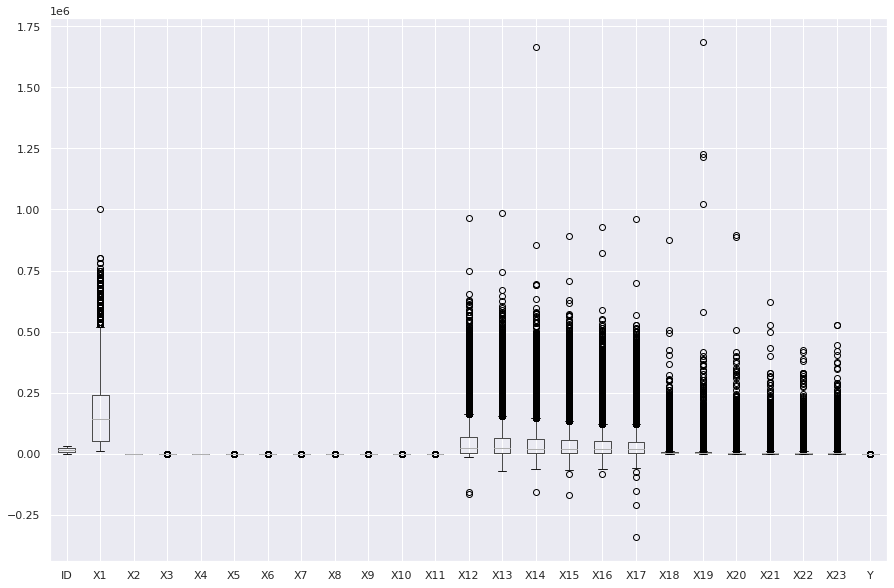

In [76]:
import matplotlib.pyplot as plt

df.boxplot()

#**Parte 2**



**¿Cuál es el número de componentes mínimo y por qué?**
El mínimo de componentes que se analizó para este caso fueron 7, ya que esos tienen la mayor parte de la ponderación de todo el dataset.

Se observa que del PC1 al PC7 explican más del 80% del conjunto de datos. 


**¿Cuál es la variación de los datos que representan esos componentes?**

Se tiene una varianza alrededor del 86% de estos primeros 7 componentes, arriba del componente 8 va aumentando con una variación muy ligera comparada a los primeros componentes.

**¿Cuál es la pérdida de información después de realizar PCA?**

Es alrededor del 17% ya que se toma solo un número de componentes, el resto se omiten en el modelo.

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

X18, X12, X19, X23, X20, X22  son las variables que tienen mayor importancia dentro de los componentes PC1-PC8 siendo los componentes más importants del dataset.


**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Cuando se tiene una gran cantidad de features, datasets con mucha dimensionalidad se recomienda hacer el uso de técnicas para reducción de dimensionalidad, PCA es una de ellas y muestra buenos resultados.

PCA reduce y transforma la cantidad de features que hay en un dataset en un número más chico de features que llamamos componentes principales, en nuestro ejercicio los llamamos "PC" (Principal components) que al mismo tiempo de reducirlos se intenta de retener la mayor cantidad de información que teníamos en el dataset original.

El beneficio que trae a Machine Learning esta técnica es la de mejorar el rendimiento del algoritmo, el tiempo para entreanar el modelo es reducido significativamente.
